In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("Road_Accidents.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Accident_Severity        1048575 non-null  int64 
 1   Number_of_Vehicles       1048575 non-null  int64 
 2   Number_of_Casualties     1048575 non-null  int64 
 3   Road_Type                1048575 non-null  object
 4   Speed_limit              1048575 non-null  int64 
 5   Light_Conditions         1048575 non-null  object
 6   Road_Surface_Conditions  1048575 non-null  object
dtypes: int64(4), object(3)
memory usage: 56.0+ MB


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['Number_of_Vehicles', 'Number_of_Casualties', 'Road_Type', 'Speed_limit', 'Light_Conditions', 'Road_Surface_Conditions']], data['Accident_Severity'], test_size=0.20, random_state=42)


In [14]:
train_data = X_train.join(y_train)

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.Road_Type)).drop(['Road_Type'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Light_Conditions)).drop(['Light_Conditions'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.Road_Surface_Conditions)).drop(['Road_Surface_Conditions'], axis=1)

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(train_data[['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']], train_data['Accident_Severity'])


LinearRegression()

In [18]:
y_pred = reg.predict(train_data[['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']])


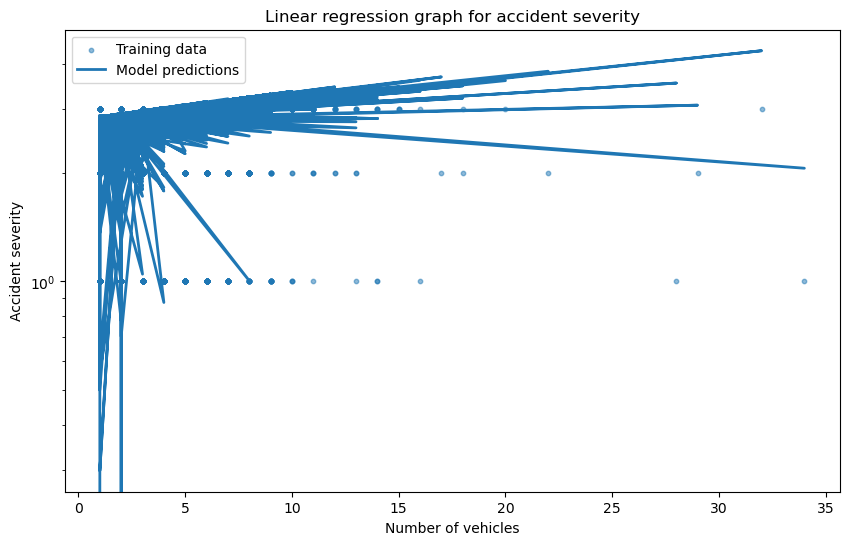

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Increase the figure size
plt.scatter(train_data['Number_of_Vehicles'], train_data['Accident_Severity'], s=10, alpha=0.5, label='Training data') # Increase the marker size and use a transparency effect
plt.plot(train_data['Number_of_Vehicles'], y_pred, lw=2, label='Model predictions') # Increase the line width
plt.xlabel('Number of vehicles')
plt.ylabel('Accident severity')
plt.title('Linear regression graph for accident severity')
plt.yscale('log') # Use a logarithmic scale on the y-axis
plt.legend()
plt.show()
